In [2]:
import pandas as pd
import numpy as np
import re
import re
import ast
import nltk

In [3]:
import re
import networkx as nx
from practnlptools.tools import Annotator

### Shortest path algorithm for association of drug and temporal


In [ ]:
allowable_words_drug= "(and|&|with|/|-|,)"
drugexp = re.compile(allowable_words_drug,re.IGNORECASE)

In [ ]:
re.sub(allowable_words_drug,' ','Ipi/Nivo')

In [ ]:
graph = nx.Graph(sent_list[0])

In [ ]:
print(nx.shortest_path_length(graph, source=source[0], target=target[0]))

In [ ]:
sent_list = xml_input('24031995')

In [ ]:
print xml_input('14864_16')[0]

In [ ]:
word_index ={}
word_index[] 

In [ ]:
#df_for_75 = pd.read_csv('75_users_Updated_pattern_after_negtool_rectify.csv')

In [ ]:
# u_pattern = ast.literal_eval(df_for_75['updated_pattern'][778])
# u_index = ast.literal_eval(df_for_75['updated_index'][778])
# u_words = ast.literal_eval(df_for_75['updated_words'][778])
# temp_words = ast.literal_eval(df_for_75['Temporal'][778])
# temp_index = ast.literal_eval(df_for_75['Temp_index'][778])
# temp_conversion = ast.literal_eval(df_for_75['Temp_conversion'][778])

In [ ]:
# print u_pattern
# print u_index
# print u_words
# print temp_words
# print temp_index
# #print temp_conversion

### Below code for Drug-Temporal association

#### Tuple is created 

In [359]:
import re
import networkx as nx
import xmltodict
import ast
import pandas as pd
import numpy as np

def isDrugMention(token):
    with open("updated_drugs_v2.txt","r") as f:
        drug = f.read()
    try:
        
        if len(re.findall(r"\b(?=\w)"+token+r"\b(?!\w)",drug))>=1:
            #print 1
            return 1
    except:
        return 0

def consecutive(data, stepsize=1):
    return np.split(data, np.where(np.diff(data) != stepsize)[0]+1)

def getmin(l,wordsList):
    if(len(l)==len(wordsList)):
        if len(l)==1:
            return l
        else: 
            return l[0]
    else:
        return None


def xml_input(unique_id):
    xmlfile = 'post'+'_'+unique_id+'.txt.xml'

    with open('C:/Users/varun.behl/Documents/test_plain_text_updated/output_from_domino/'+xmlfile) as fd:
        doc2 = xmltodict.parse(fd.read())

    _id = []
    wi =[]
    word = []
    lemma = []
    cpostag = []
    head = []
    deprel = []
    token_dict = {}
    word_index = {}
    conll_pattern = []
    conll_index = []

    sentence_start = []
    sentence_start.append(1)
    for i in range(1,len(doc2['CAS']['org.apache.ctakes.typesystem.type.syntax.ConllDependencyNode'])):
        if doc2['CAS']['org.apache.ctakes.typesystem.type.syntax.ConllDependencyNode'][i]['@id'].encode("utf-8")=='0':
            sentence_start.append(prev_token+1)
            continue
        token_dict[(doc2['CAS']['org.apache.ctakes.typesystem.type.syntax.ConllDependencyNode'][i]['@_id']).encode("utf-8")]=[i,(doc2['CAS']['org.apache.ctakes.typesystem.type.syntax.ConllDependencyNode'][i]['@cpostag']).encode("utf-8")]
        _id.append((doc2['CAS']['org.apache.ctakes.typesystem.type.syntax.ConllDependencyNode'][i]['@_id']).encode("utf-8"))
        wi.append((doc2['CAS']['org.apache.ctakes.typesystem.type.syntax.ConllDependencyNode'][i]['@id']).encode("utf-8"))
        wix = doc2['CAS']['org.apache.ctakes.typesystem.type.syntax.ConllDependencyNode'][i]['@id'].encode("utf-8")
        head.append((doc2['CAS']['org.apache.ctakes.typesystem.type.syntax.ConllDependencyNode'][i]['@_ref_head']).encode("utf-8"))
        cpostag.append((doc2['CAS']['org.apache.ctakes.typesystem.type.syntax.ConllDependencyNode'][i]['@cpostag']).encode("utf-8"))
        word = doc2['CAS']['org.apache.ctakes.typesystem.type.syntax.ConllDependencyNode'][i]['@form'].encode("utf-8")
        if isDrugMention((doc2['CAS']['org.apache.ctakes.typesystem.type.syntax.ConllDependencyNode'][i]['@form']).encode("utf-8")):
            conll_pattern.append('D')
            conll_index.append(int((doc2['CAS']['org.apache.ctakes.typesystem.type.syntax.ConllDependencyNode'][i]['@id']).encode("utf-8"))-1)
        prev_token=int(doc2['CAS']['org.apache.ctakes.typesystem.type.syntax.ConllDependencyNode'][i]['@id'])
        word_index[wix] =word
        
        #print prev_token
    #print "lenght:", len(doc2['CAS']['org.apache.ctakes.typesystem.type.syntax.ConllDependencyNode'])
    head_index = []
    head_pos = []
    for i in range(0,len(head)):
        try:
            head_index.append(token_dict[str(head[i])][0])
            head_pos.append(token_dict[str(head[i])][1])
        except:
            head_index.append(0)
            head_pos.append(cpostag[i])
            
    #print wi        
    sent_list = []
    dep_list = []
    sentence_count = 0
    for i in range(0,len(head)):
        if wi[i] == sentence_start[sentence_count]:
            sent_list.append(dep_list)
            sentence_count += 1
            dep_list = []
        w_i = wi[i]
        h_i = str(head_index[i])
        dep_tup = (h_i,w_i)
        dep_list.append(dep_tup)
    sent_list.append(dep_list)

    
    return sent_list , word_index

def get_distance(distance_drug, distance_temp):
    try:
        distance_value=nx.shortest_path_length(graph, source=str(distance_drug), target=str(distance_temp))
    except :
        distance_value = 5
    return distance_value
    
def association(i,u_pattern,u_index ,u_words,temp_words , temp_conversion , Unique_id ,temp_index ):
    
    global word_index
    sent,word_index = xml_input(Unique_id)
   
    graph = nx.Graph(sent[0])
    
    associated_list = []
    converted_temp = []
    for index_d,value_d in enumerate(u_pattern):
        #print index
        #print value
        
        if(u_pattern[index_d]=='D'):
            Drug=u_words[index_d]
            for r in (("/"," / "),("-"," - ")):
                Drug = Drug.replace(*r)
            drug_list = Drug
            print drug_list
            #allowable_words_drug= "(/)"
            #drugexp = re.compile(allowable_words_drug,re.IGNORECASE)
            #drug_list = re.sub(allowable_words_drug,' / ',Drug)
            print "here",nltk.word_tokenize(drug_list)
            druglist = drug_list.split(" ")
            print "drugList" ,druglist
            wordsInDrug = len(druglist)
            drug_indices = np.array([int(key) for key, value in word_index.iteritems() if value in druglist])
            
            consecutive_drug = consecutive(sorted(drug_indices))
            val_drug = np.asarray(map(lambda y: getmin(y,druglist),consecutive_drug))
            distance_drug = val_drug[np.where(val_drug!=None)]
            print distance_drug , Drug
            try :
                assert(len(distance_drug)<=len(consecutive_drug))
            except AssertionError:
                print "Drug length mismatch"
                
            if(len(distance_drug)>1):
                print "Same drug in more than one place"
                
                
            #temp_indices = np.array([int(key) for key, value in words_index.iteritems() if value in temp_list])
            #print Drug
            past=1000
            actual_temporal=''
            for index_t,value_t in enumerate(temp_words):
                temporal_word=temp_words[index_t]
                
                
                temp_list = nltk.word_tokenize(temporal_word)
                wordsInTemp = len(temp_list)
                temp_indices = np.array([int(key) for key, value in word_index.iteritems() if value in temp_list])
                
                consecutive_temp = consecutive(sorted(temp_indices))
                #print len(consecutive_temp) , len(temp_list)
                val_temp = np.asarray(map(lambda x: getmin(x,temp_list),consecutive_temp))
                
                distance_temp = val_temp[np.where(val_temp!=None)]
                print distance_temp , temporal_word
               
                
                try:
                    assert(len(distance_temp)==1)
                except AssertionError:
                    print "Too many lists match the condition_temp"
                    distance_temp = [0]
                
               
                print temporal_word,distance_temp
                for i in distance_drug:
                    if (i - distance_temp[0])**2 in [1,4] :
                        distance_value = 1
                    else:
                        try:
                            distance_value=nx.shortest_path_length(graph, source=str(distance_temp[0]), target=str(i))
                            print "here",distance_value
                        except :
                            print "except"
                            distance_value = 7

                    
              
                    if distance_value<past and distance_value<=6:
                        past=distance_value
                        actual_temporal=temporal_word
                        associated_list.append((Drug,actual_temporal))
                        converted_temp.append(temp_conversion[index_t])
    return associated_list , converted_temp

In [ ]:
np.array([value for key, value in word_index.iteritems() if key =='6' ])

In [5]:
df_75 = pd.read_csv("100_users_updated_negtool_v1.csv")

In [308]:
df_75['Tokenized.Sentences'][30]

'- In Nov 2015, one high dose of SRS following a craniotomy to remove a hemorrhaging tumor in right lobe.- In Nov 2015, I had the 3rd combo infusion of Ipilimumab/Nivolumab.- In Dec 2015, I had a total of six (6) rounds of SRS on two locations to hit two s'

In [361]:
temp_converted = []
associated_list = []
for i in range(0,len(df_75)):
    print i
    u_pattern = ast.literal_eval(df_75['Updated_pattern'][i])
    u_index = ast.literal_eval(df_75['Updated_index'][i])
    u_words = ast.literal_eval(df_75['Updated_words'][i])
    temp_words = ast.literal_eval(df_75['Temporal'][i])
    temp_conversion = ast.literal_eval(df_75['Temp_conversion'][i])
    temp_index = ast.literal_eval(df_75['Temp_index'][i])
    Unique_id = str(df_75['Unique_id'][i])
    as_list  , temp_conv = association(i,u_pattern,u_index ,u_words,temp_words , temp_conversion , Unique_id , temp_index)
    associated_list.append(as_list)
    temp_converted.append(temp_conv)

0
Pembrolizumab
here ['Pembrolizumab']
drugList ['Pembrolizumab']
[8] Pembrolizumab
1
Pembrolizumab
here ['Pembrolizumab']
drugList ['Pembrolizumab']
[8] Pembrolizumab
2
Pembrolizumab
here ['Pembrolizumab']
drugList ['Pembrolizumab']
[6] Pembrolizumab
[8] yesterday
yesterday [8]
[13] today
today [13]
here 4
3
Pembrolizumab
here ['Pembrolizumab']
drugList ['Pembrolizumab']
[10] Pembrolizumab
[6] weeks
weeks [6]
here 5
4
BRAF
here ['BRAF']
drugList ['BRAF']
[12] BRAF
[5] week
week [5]
here 5
5
Ipilimumab
here ['Ipilimumab']
drugList ['Ipilimumab']
[4] Ipilimumab
[6] today
today [6]
6
Ipilimumab
here ['Ipilimumab']
drugList ['Ipilimumab']
[14] Ipilimumab
7
Ipilimumab
here ['Ipilimumab']
drugList ['Ipilimumab']
[14] Ipilimumab
8
Ipilimumab
here ['Ipilimumab']
drugList ['Ipilimumab']
[7] Ipilimumab
[8] yesterday
yesterday [8]
9
Aldesleukin
here ['Aldesleukin']
drugList ['Aldesleukin']
[19] Aldesleukin
[2] this year
this year [2]
here 6
10
Ipilimumab
here ['Ipilimumab']
drugList ['Ipilimumab

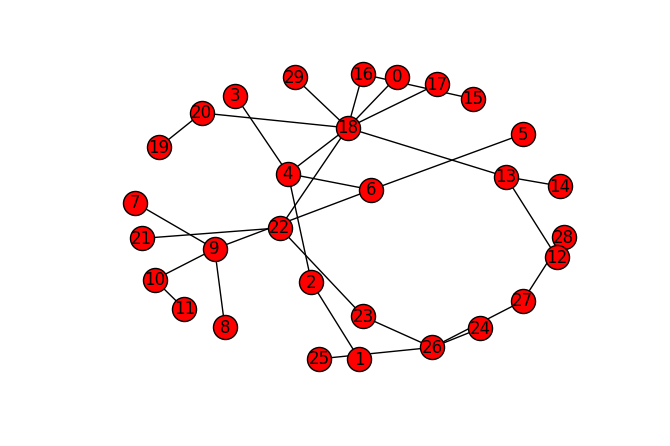

In [290]:
import matplotlib.pyplot as plt
nx.draw(graph, with_labels=True)
plt.show()

In [306]:
associated_list

[[('Aldesleukin', 'the end of this month')]]

In [280]:
sent = [('2', '1'), ('4', '2'), ('4', '3'), ('18', '4'), ('6', '5'), ('4', '6'), ('9', '7'), ('9', '8'), ('6', '9'), ('9', '10'), ('10', '11'), ('13', '12'), ('18', '13'), ('13', '14'), ('16', '15'), ('18', '16'), ('18', '17'), ('0', '18'), ('20', '19'), ('18', '20'), ('22', '21'), ('18', '22'), ('22', '23'), ('26', '24'), ('26', '25'), ('23', '26'), ('26', '27'), ('27', '28'), ('18', '29')]

In [281]:
graph  = nx.Graph(sent)

In [261]:
type(graph)

networkx.classes.graph.Graph

In [291]:
nx.shortest_path_length(graph, source='10', target='11')

1

In [ ]:
df_75['Tokenized.Sentences'][29]
df_75['Temporal'][29]

In [362]:
Associated_drug_temporal_data = pd.DataFrame(
    {'associated_dt': associated_list,
     'Temp_converted': temp_converted })

In [ ]:
Associated_drug_temporal_data.head()

In [363]:
Associated_drug_temporal_data.to_csv('Associated_drug_temporal_data_v6.csv' , index = False)

In [364]:
Data_100_users_roll_up_v1 = pd.concat([df_75,Associated_drug_temporal_data],axis=1)

In [365]:
Data_100_users_roll_up_v1.to_csv("Data_100_users_roll_up_v3.csv" , index = False)

In [ ]:
#for i in range(0, len(df_for_75['Unique_id'])):
#    print i
association_list , converted_temp = association(18)

In [ ]:
association_list

In [ ]:
text = "Full body PET CT in 3 weeks and then either the 6th Pembrolizumab or possible a short switch to Ipilimumab.Will keep you posted.Oh, LESLIE - I think our situation indeed gives more evidence to the 'drug holiday' idea (typically 3 months+ but in our case only 2 months), supports that brain mets can be treated with BRAF/MEK and/or PD1 and finally that BRAF/MEK and immunotherapy could be combined with success and so far with zero side effects."

In [ ]:
import nltk

In [ ]:
a = nltk.word_tokenize(z)

In [ ]:
z = re.sub('2 months',"TEMPORAL" ,text)
print z

In [ ]:
a.index('TEMPORAL')

In [ ]:
Data_75 = pd.read_csv('75_users_Updated_pattern_after_negtool.csv')

In [ ]:
Data_75.columns

In [ ]:
After_negation = Data_75.drop([ 'Index','Pattern','Words' ,'Unique_id.1'],1)

In [ ]:
a_1 = []
b_1 = []
c_1  =[]
for i in range(0, len(After_negation['Unique_id'])):
    U_p = ast.literal_eval(After_negation['Updated_pattern'][i])
    a = []
    b = []
    c = []
    
    for each,val in enumerate(U_p):
        #print a[each]
        if val!='T':
            a.append(ast.literal_eval(After_negation['Updated_words'][i])[each])
            b.append(ast.literal_eval(After_negation['Updated_index'][i])[each])
            c.append(ast.literal_eval(After_negation['Updated_pattern'][i])[each])
            
    a_1.append(a)
    b_1.append(b)
    c_1.append(c)

In [ ]:
After_negation_v1 = After_negation.drop(['Updated_index','Updated_pattern' ,'Updated_words'],1)

In [ ]:
After_negation_v1['updated_pattern'] = c_1
After_negation_v1['updated_index'] = b_1
After_negation_v1['updated_words'] = a_1

In [ ]:
After_negation_v1

In [ ]:
After_negation_v1.to_csv('After_negation_dataset_v1.csv' , index  =False)

In [ ]:

def Diff(li1, li2):
    if li1==[[]] or li2==[[]]:
        li_dif = []
    else :
        li_dif = [i-j for i in li1 for j in li2]
    return li_dif

def Drug_out(Temporal_pattern,Drug_order_pattern,P_D,T_D,Words):
    L1 =  [-2,-3,-4,-5,-6]

    drug_lst = []
    Temp_index = []
    words = []
    print z
    #for i in range(0,len(Analysis_data_filter_Pos_Drug_mention['Pattern'])): 
    #Case 1 : Drug mention = 1
    if x == 2 :
        indices = [index for index, value in enumerate(ast.literal_eval(y)) if value == 'D'] 
        for s in indices:
            drug_lst.append(ast.literal_eval(Words)[s])
        
            print drug_lst
            
        if len(np.unique(drug_lst)) == 1:    
                x =1
        
        elif 'T' in ast.literal_eval(y):
                print "here"
                #if len([i for i in L1 if i in ast.literal_eval(T_D)]) > 0 :
                D_indices = [index for index, value in enumerate(ast.literal_eval(y)) if value == 'D'] 
                T_indices = [index for index, value in enumerate(ast.literal_eval(y)) if value == 'T'] 
                print D_indices ,T_indices
                #print ast.literal_eval(z)[t_i]

                for t_i in T_indices :
                    print t_i
                    Temp_index.append(ast.literal_eval(z)[t_i])

                for c in D_indices:
                    print "c",c
                    drug_ind_temp = []
                    drug_ind_temp.append(ast.literal_eval(z)[c])
                    #print list(int(ast.literal_eval(z)[c]))
                    dist = Diff(drug_ind_temp, Temp_index)
                    drug_ind_temp = []
                    print "here",dist
                    if len([i for i in L1 if i in dist]) > 0 :
                        print "yes"
                        words.append(ast.literal_eval(Words)[c])

                                          
    

    if x==1:
        print "X1"
        if 'T' in ast.literal_eval(y):
            #print "here"
            if len([i for i in L1 if i in ast.literal_eval(T_D)]) > 0 :
                ind = ast.literal_eval(y).index('D')
                
                words = ast.literal_eval(Words)[ind]
            else :
                words = 0

        else :
                ind = ast.literal_eval(y).index('D')
                words = ast.literal_eval(Words)[ind]
                      
    return words

In [ ]:
df['Tokenized.Sentences'][1]